In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# import
st_law_bars = pd.read_csv("output_data/e_coast_laws_by_state.csv")

In [12]:
df = st_law_bars
df['Start of Relief'].value_counts()

2014.0    29689
2015.0    24103
2017.0    14594
2016.0    12068
2018.0     7003
Name: Start of Relief, dtype: int64

In [13]:
df.State.unique()

array(['al', 'ct', 'de', 'ga', 'la', 'ma', 'md', 'me', 'ms', 'nc', 'nh',
       'nj', 'ny', 'ri', 'sc', 'va'], dtype=object)

In [14]:
df['Main Interest Type'].value_counts()

STATE MASTER                                  70085
ICIS-NPDES NON-MAJOR                           4769
FORMAL ENFORCEMENT ACTION                      3870
ICIS-NPDES UNPERMITTED                         2110
ENFORCEMENT/COMPLIANCE ACTIVITY                1682
STORM WATER INDUSTRIAL                         1089
STORM WATER CONSTRUCTION                        900
LQG                                             528
SQG                                             338
TRI REPORTER                                    293
CONCENTRATED ANIMAL FEEDING OPERATION           256
CESQG                                           238
PHASE II MS4                                    202
UNSPECIFIED UNIVERSE                            197
RMP REPORTER                                    172
COMMUNITY WATER SYSTEM                          141
ICIS-NPDES MINOR                                 82
AIR MAJOR                                        66
TRANSIENT NON-COMMUNITY WATER SYSTEM             48
TSD         

In [6]:
x = df[['Start of Relief', 'State', 'Main Interest Type']]

In [7]:
def time_change(df):

    sorted_states = ['al', 'ct', 'de', 'ga', 
                    'la', 'ma', 'md', 'me', 
                    'ms', 'nc', 'nh', 'nj', 
                    'ny', 'ri', 'sc', 'va']
    
    # Get df ready to become a percentage stacked bar chart
    percent = df.groupby(['Start of Relief', 'State'])['Start of Relief'].count().unstack('State')/16*100
    
    # Sort df by income groups
    percent.columns = pd.CategoricalIndex(percent.columns.values, 
                                     ordered=True, 
                                     categories=sorted_states)
    percent = percent.sort_index(axis=1)
    
    # Plot
    ax = percent.plot(kind='bar', stacked=True, 
                 title='Annual State Interest', 
                 figsize=(10,10), 
                 rot=0)
    
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tick_params(left=False)
    plt.legend(loc='upper right')
    plt.axhline(20, color='white', alpha=0.25)
    plt.axhline(40, color='white', alpha=0.25)
    plt.axhline(60, color='white', alpha=0.25)
    plt.axhline(80, color='white', alpha=0.25)
    sns.despine(top=True, right=True)
    
    plt.show()

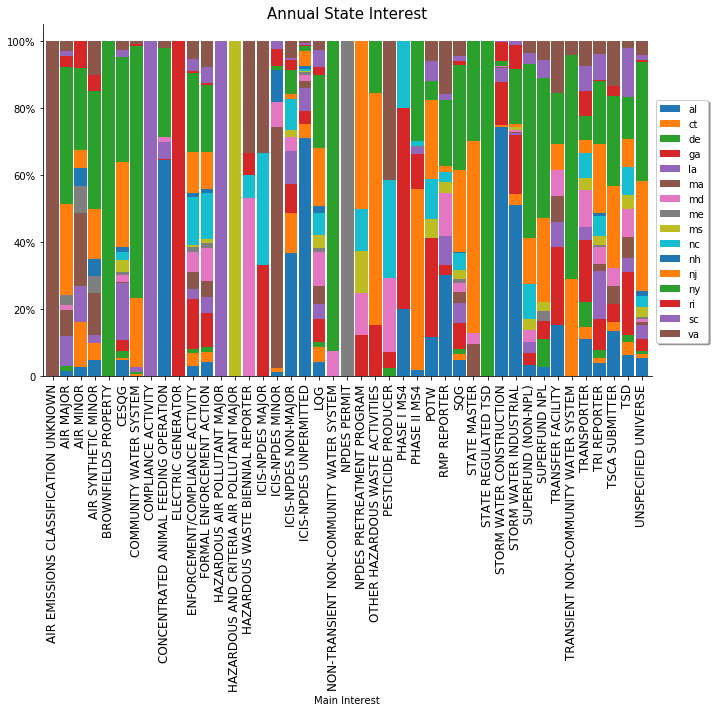

In [8]:
# Group dataset by State and Main Interest Type
grouped = x.groupby(['State', 'Main Interest Type']).count().reset_index()

# Pivot dataset
g_pivot = grouped.pivot(index='Main Interest Type', columns='State', values='Start of Relief')
g_pivot = g_pivot.fillna(0)


plt.figure(figsize=(10,10))

# Plot breakdown
ax2 = plt.subplot(1,1,1)
g_pivot.div(g_pivot.sum(axis=1), axis=0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_title('Annual State Interest', fontsize=15)
ax2.set_xlabel('Main Interest')
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.legend(loc='upper center', bbox_to_anchor=(1.05, 0.8), shadow=True, ncol=1)
plt.xticks(fontsize=12)

sns.despine(top=True, right=True)
plt.tight_layout()


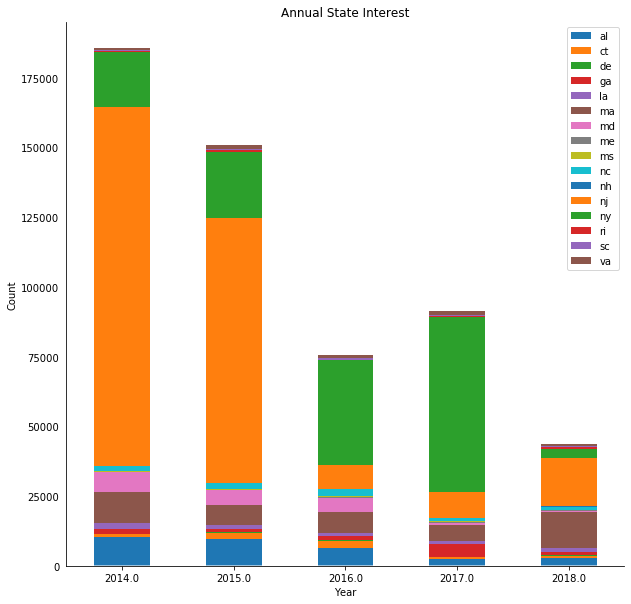

<Figure size 432x288 with 0 Axes>

In [9]:
time_change(x)
plt.savefig("output_data/State_Interest_perYear.png")